In [7]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #for explotary analysis
import seaborn as sns  #for explotary analysis

df = pd.read_csv('/kaggle/input/heart-disease-dataset/heart.csv')  # adjust path if needed
df.head()



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
#view basic stats
df.describe()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
print(df.info())
print(df.isnull().sum())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
  

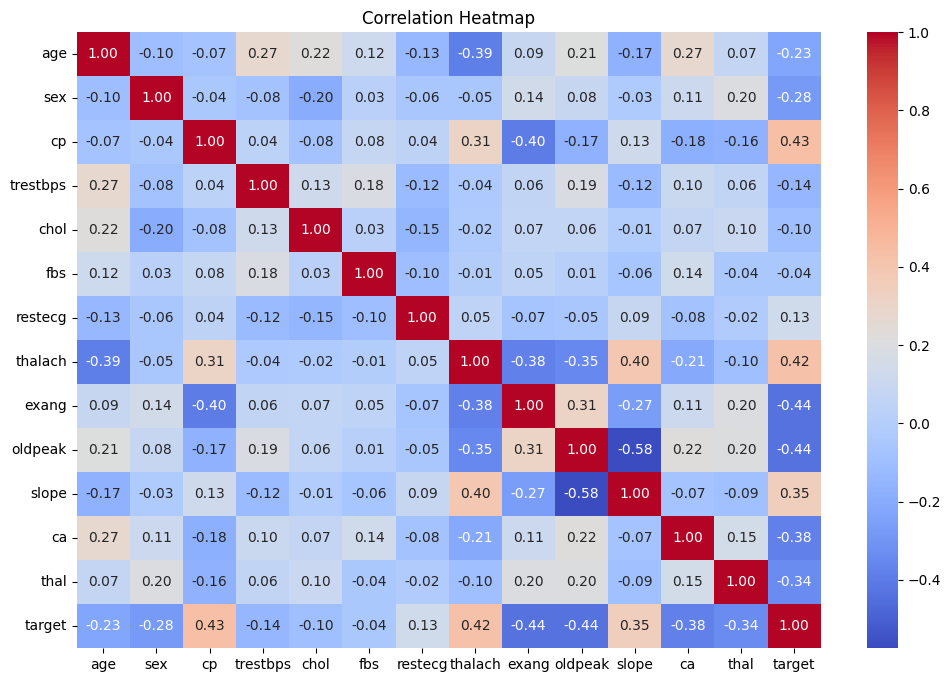

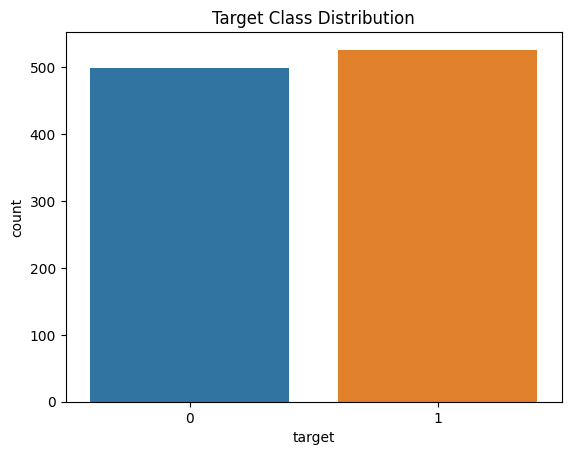

In [8]:
# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Target value count
sns.countplot(data=df, x='target')
plt.title("Target Class Distribution")
plt.show()


In [10]:
#check the class balance numerically

print(df['target'].value_counts())
percentages = df['target'].value_counts(normalize=True) * 100
print(percentages)


target
1    526
0    499
Name: count, dtype: int64
target
1    51.317073
0    48.682927
Name: proportion, dtype: float64


In [12]:
#preprocessing 
from sklearn.preprocessing import StandardScaler

X = df.drop('target', axis=1)
y = df['target']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [13]:
#moedel training
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [14]:
#Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7951219512195122
Confusion Matrix:
 [[73 29]
 [13 90]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



Accuracy: 0.9853658536585366


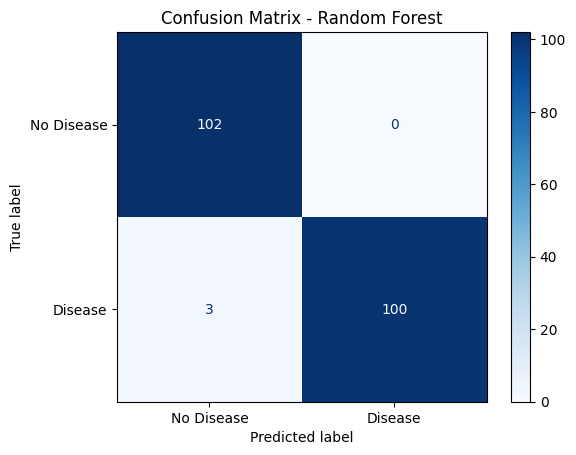

In [15]:
#Use a Random Forest Classifier and Plot the Confusion Matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# 1. Train-Test Split (if not already done)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 2. Train Random Forest Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 3. Make Predictions
y_pred = model.predict(X_test)

# 4. Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# 5. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# 6. Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Disease", "Disease"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()


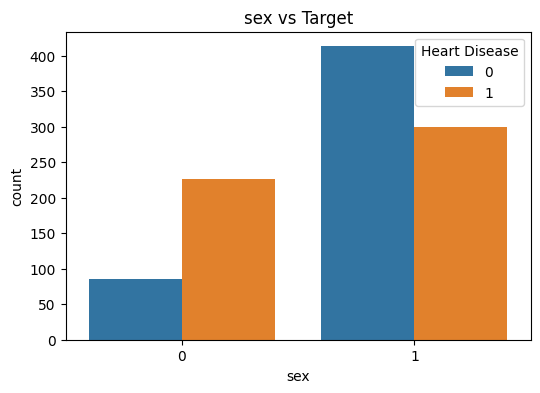

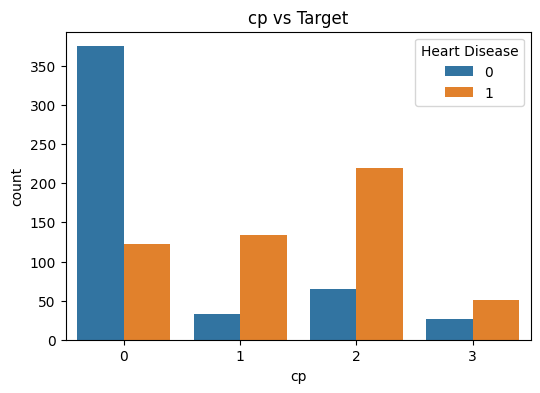

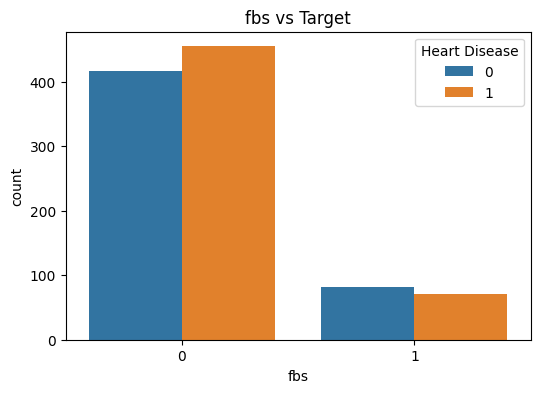

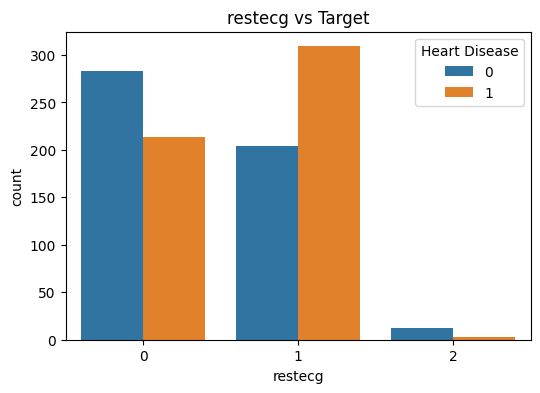

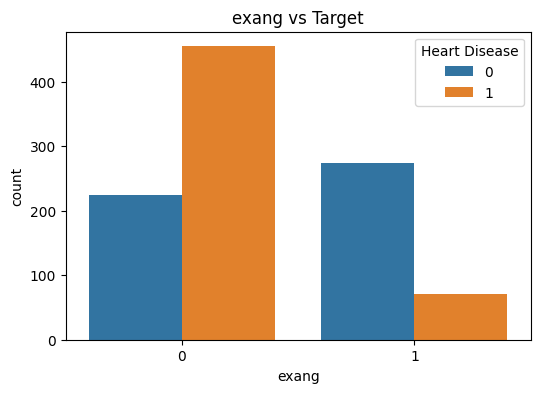

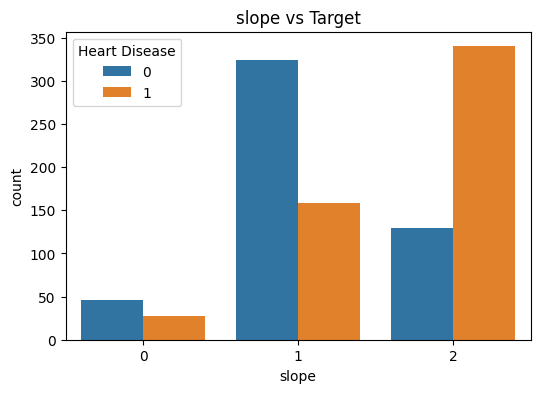

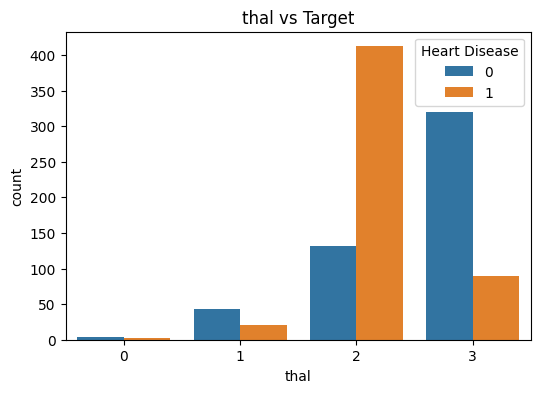

In [19]:
#Additional
#Relationships Between Features and Target
categorical_features = ['sex', 'cp', 'fbs', 'restecg',
                        'exang', 'slope', 'thal']

for feature in categorical_features:
    plt.figure(figsize=(6,4))
    sns.countplot(x=feature, hue='target', data=df)
    plt.title(f'{feature} vs Target')
    plt.legend(title='Heart Disease')
    plt.show()


In [18]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


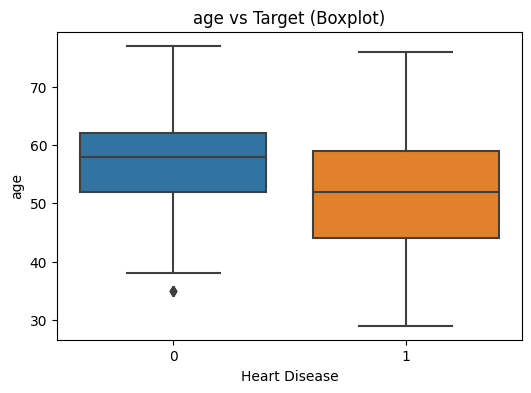

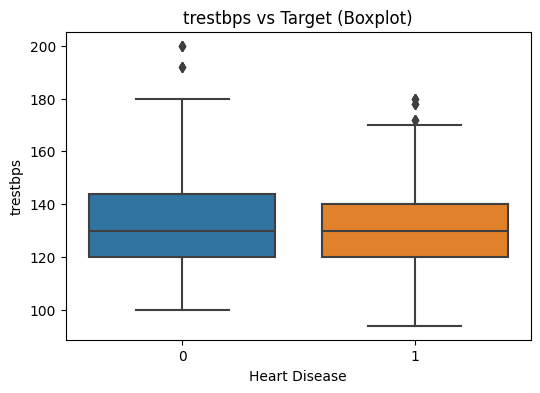

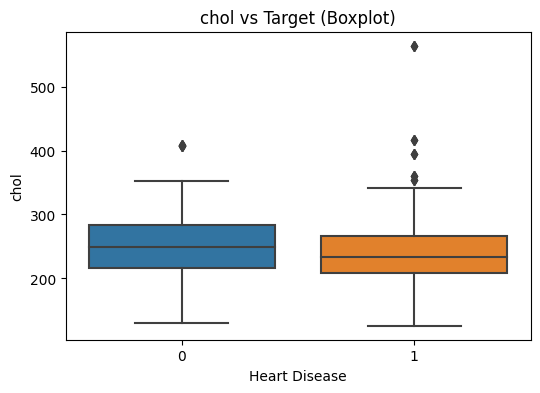

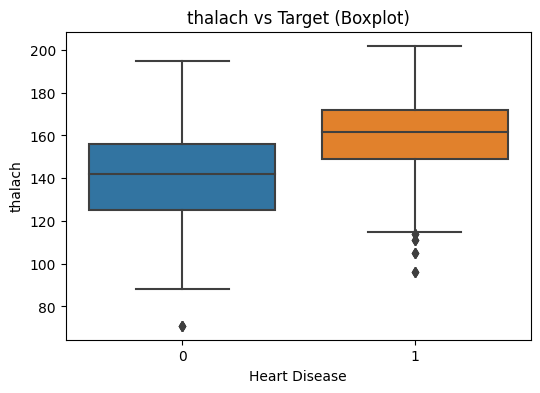

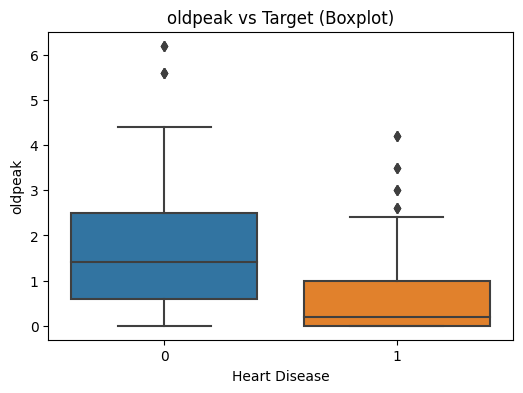

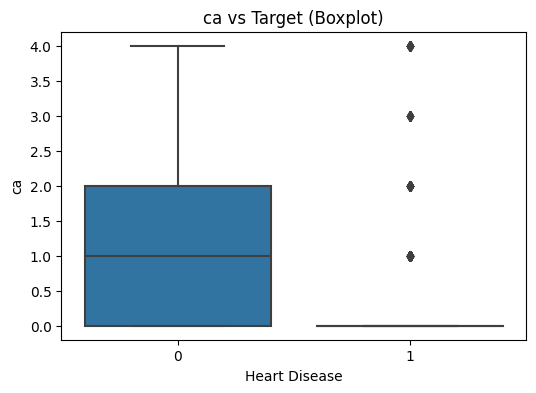

In [21]:
#Numerical Features vs Target (Use Boxplots or Histograms)

numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

for feature in numerical_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='target', y=feature, data=df)
    plt.title(f'{feature} vs Target (Boxplot)')
    plt.xlabel('Heart Disease')
    plt.ylabel(feature)
    plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

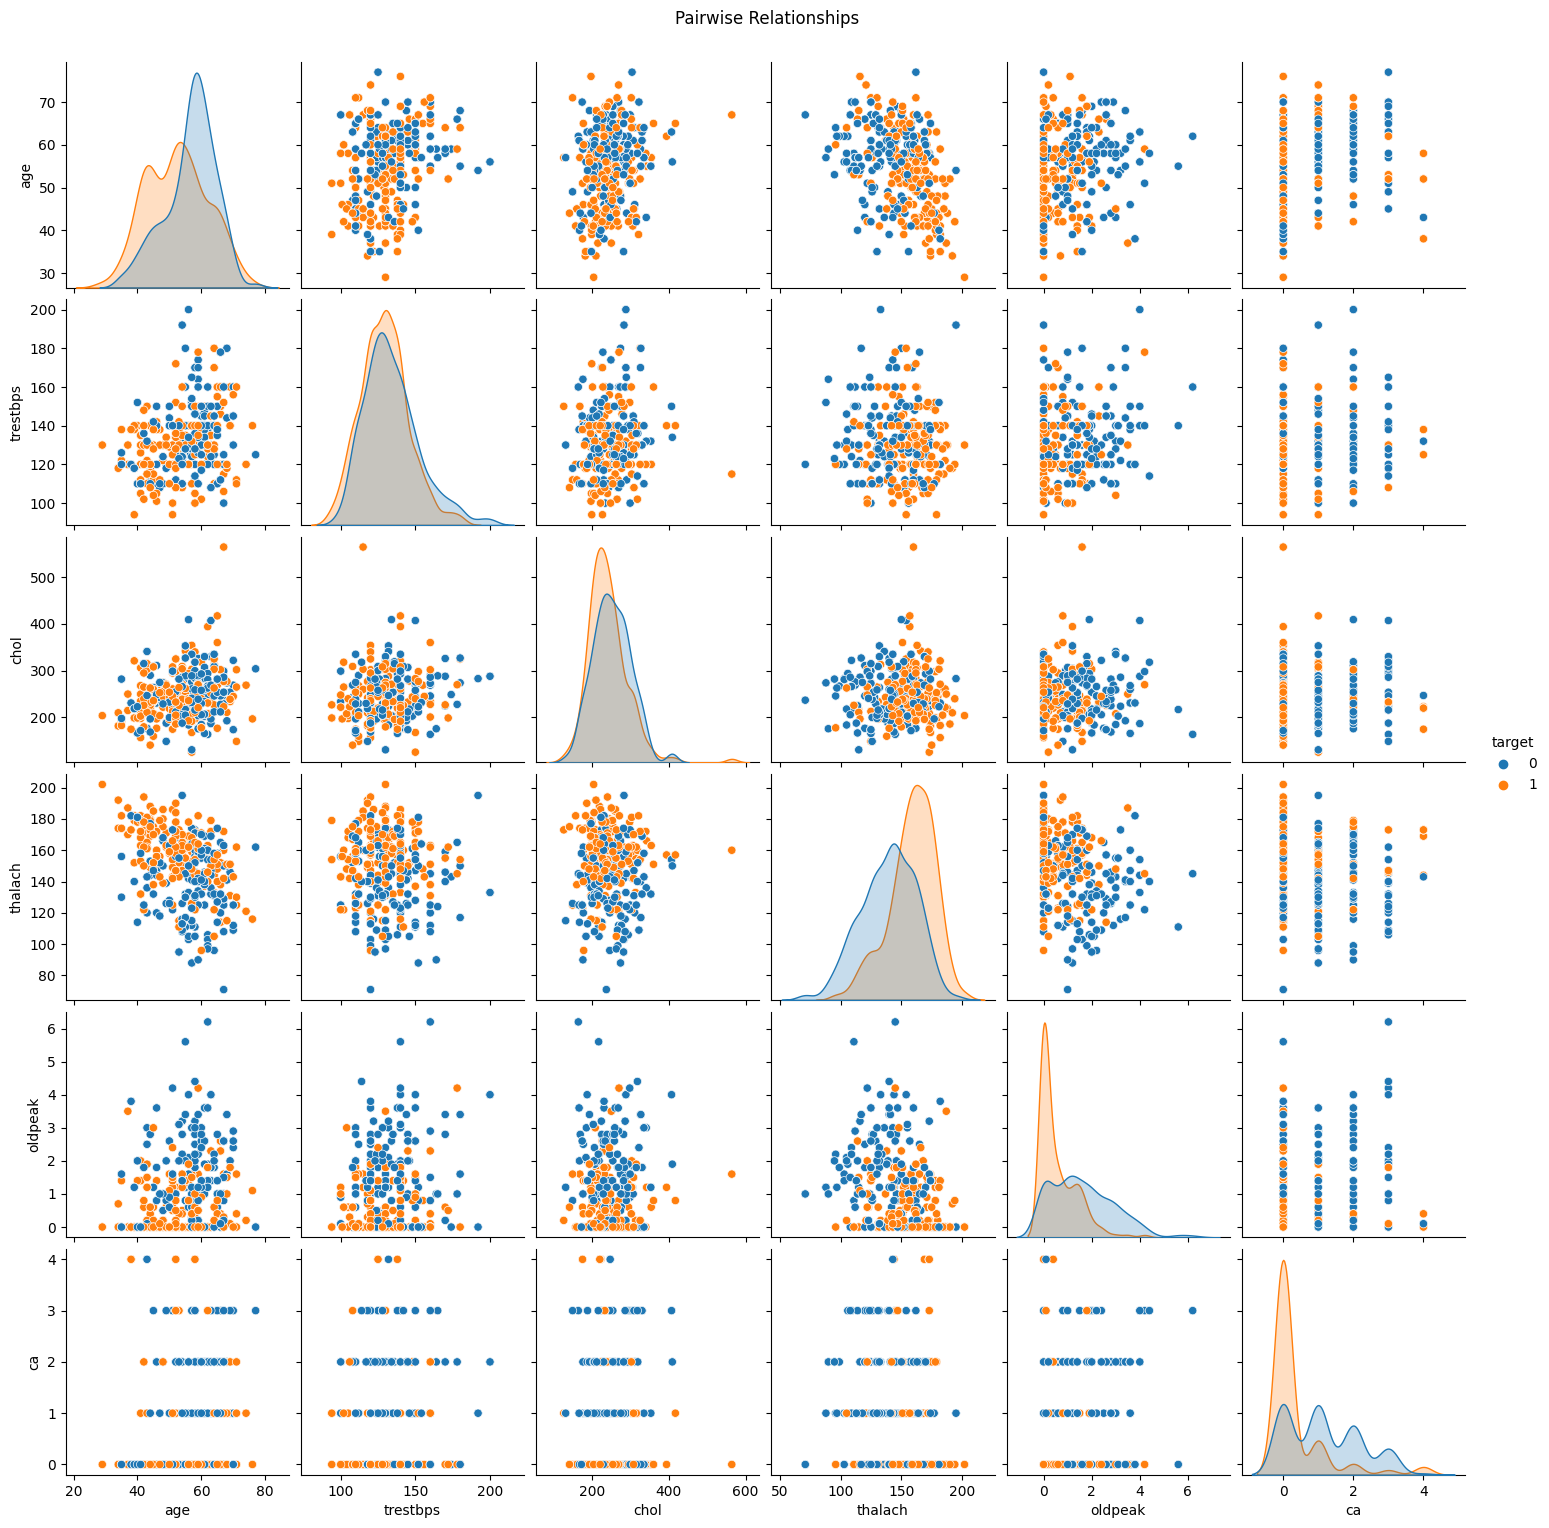

In [22]:
sns.pairplot(df, hue='target', vars=numerical_features)
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()
